## EXERCISES_RLAB05

#### REZA RAJAEE (2040483)

In [2]:
library(tibble)
library(dplyr)
library(ggplot2)
library("ggrepel") 
library(scales)
library(ggpubr)
library(tidyr)
library(bayestestR)
library('GoFKernel')
options(warn=-1)

## Exercise 1
#### • the number of particles emitted by a radioactive source during a fixed interval of time (∆t =10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3
#### (a) suppose a uniform prior distribution for the parameter µ 
#### - determine and draw the posterior distribution for µ, given the data

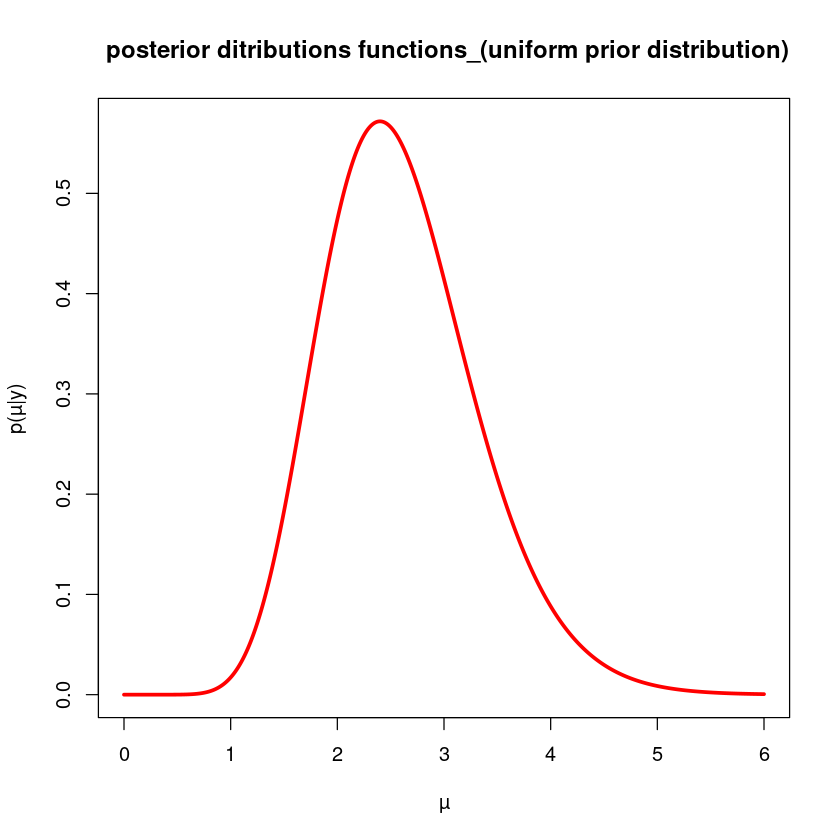

In [3]:
###  Likelihood for a Poisson process : multiple independent  measurements of a posson procees similar 
### to the Gamma distribution function with α=Y+1 that Y=4+1+3+1+3=12 and λ=5.

y <- 12
lambda <- 5
n <- 5

like <- function(x){
    return(dgamma(x, shape = y+1, rate = lambda))
}

### for a uniform prior we have g(µ) = 1 for µ > 0. so for posterior for multiple poisson process in this case 
## we have: the gamma distribution with α=Y+1 that Y=12 and λ=5.

pri_u <- function(x){
    return(1)
}

pos_u <- function (x){ ### the gamma distribution with α=Y+1 that Y=12 and λ=5
    return(pri_u(x)*like(x))
}

x <- seq(0,6,0.01) ## rnage x 

yPO <- c()
for (i in 1:601){
    yPO[i] <- pos_u(x[i])
}


plot(x,yPO, type='l',xlab='µ',ylab='p(µ|y)',lwd=3, col ='red',
     main = sprintf (" posterior ditributions functions_(uniform prior distribution)"))

#### - evaluate mean, median and variance, both analytically and numerically in R

In [4]:
median <- qgamma(0.5, shape = y+1, rate = lambda) ### we find the k, where P(x<k)=0.5 

### also for mean and variance for a gamma distribution with shape=α=13 and shape=λ=5 we have:
### mean = α/λ = 13/5 = 2.6 , variance = α/λ^2 = 13/25 = 0.52 that here we comput with
### mean = <x> and var(x)= <x^2> - <x>^2

m <- function(x){ ### p(x,t) * x
    return(pos_u(x)*x)
}
mean <- integrate(m,-Inf,Inf)$value ### <x>


m2 <- function(x){ ### p(x,t) * x^2
    return(pos_u(x)*(x**2))
}
m22 <- integrate(m2,-Inf,Inf)$value ### <x^2>
variance <- m22-(mean**2) ### var(x)= <x^2> - <x>^2

data <- c(4,1,3,1,3)
cat("the mean-analytically is: ",mean,"-----","the mean-numerically is: ",mean(data),"\n\n")
cat("the median-analytically is: ",median,"-----","the median-numerically is: ",median(data),"\n\n")
cat("the variance-analytically is: ",variance,"-----","the variance-numerically is: ",var(data))

the mean-analytically is:  2.6 ----- the mean-numerically is:  2.4 

the median-analytically is:  2.533646 ----- the median-numerically is:  3 

the variance-analytically is:  0.52 ----- the variance-numerically is:  1.8

#### (b) suppose a Jeffrey’s prior for the parameter µ
#### - determine and draw the posterior distribution for µ, given the data

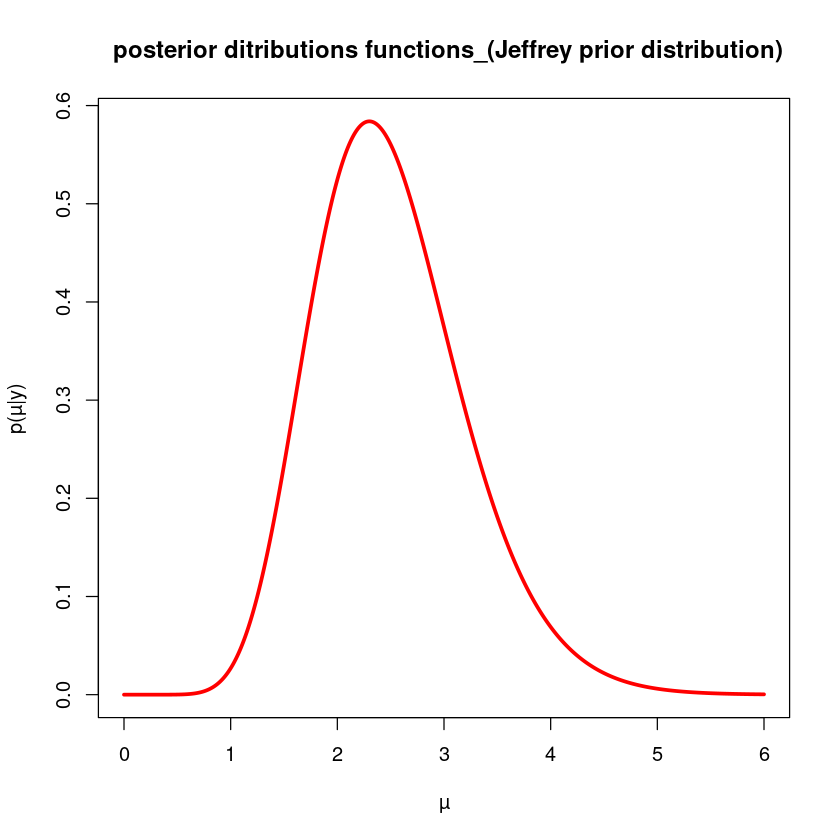

In [5]:
###  Likelihood for a Poisson process : multiple independent  measurements of a posson procees similar 
### to the Gamma distribution function with α=Y+1/2 that Y=4+1+3+1+3=12 and λ=5.

### for a Jeffrey prior we have g(µ) = µ**−1/2 for µ > 0. so for posterior for multiple poisson process
### in this case we have: the gamma distribution with α=Y+1/2 that Y=12 and λ=5.

pos_j <- function (x){
    return(dgamma(x, shape = y+(1/2), rate = lambda))
}

x <- seq(0,6,0.01) ## rnage x 

yPO <- c()
for (i in 1:601){
    yPO[i] <- pos_j(x[i])
}


plot(x,yPO, type='l',xlab='µ',ylab='p(µ|y)',lwd=3, col ='red',
     main = sprintf (" posterior ditributions functions_(Jeffrey prior distribution)"))

#### - evaluate mean, median and variance, both analytically and numerically in R

In [6]:
median <- qgamma(0.5, shape = y+(1/2), rate = lambda) ### we find the k, where P(x<k)=0.5 

### also for mean and variance for a gamma distribution with shape=α=13 and shape=λ=5 we have:
### mean = α/λ = 12.5/5 = 2.5 , variance = α/λ^2 = 12.5/25 = 0.5 that here we comput with
### mean = <x> and var(x)= <x^2> - <x>^2

m <- function(x){ ### p(x,t) * x
    return(pos_j(x)*x)
}
mean <- integrate(m,-Inf,Inf)$value ### <x>


m2 <- function(x){ ### p(x,t) * x^2
    return(pos_j(x)*(x**2))
}
m22 <- integrate(m2,-Inf,Inf)$value ### <x^2>
variance <- m22-(mean**2) ### var(x)= <x^2> - <x>^2

data <- c(4,1,3,1,3)
cat("the mean-analytically is: ",mean,"-----","the mean-numerically is: ",mean(data),"\n\n")
cat("the median-analytically is: ",median,"-----","the median-numerically is: ",median(data),"\n\n")
cat("the variance-analytically is: ",variance,"-----","the variance-numerically is: ",var(data))

the mean-analytically is:  2.5 ----- the mean-numerically is:  2.4 

the median-analytically is:  2.433659 ----- the median-numerically is:  3 

the variance-analytically is:  0.5 ----- the variance-numerically is:  1.8

#### (c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [14]:
ci_u <- ci(distribution_gamma(n, shape=y+1, scale = 1/lambda, random = FALSE), method = "ETI")
ci_j <- ci(distribution_gamma(n, shape=y+0.5, scale = 1/lambda, random = FALSE), method = "ETI")

ci_norm_j <- ci(distribution_normal(n, mean = 2.6, sd = sqrt(0.52), random = FALSE), method = "ETI")
ci_norm_u <- ci(distribution_normal(n, mean = 2.5, sd = sqrt(0.5), random = FALSE), method = "ETI")

cat("(uniform prior distribution)estimate for a 95% credibility interval:\n from gamma distribution "
    ,ci_u$CI_low,"-",ci_u$CI_high,"\n","form normal distribution",ci_norm_j$CI_low,"-",ci_norm_j$CI_high,"\n\n")
cat("(Jeffrey prior distribution)estimate for a 95% credibility interval:\n from gamma distribution "
    ,ci_j$CI_low,"-",ci_j$CI_high,"\n","form normal distribution",ci_norm_j$CI_low,"-",ci_norm_j$CI_high,"\n\n")

(uniform prior distribution)estimate for a 95% credibility interval:
 from gamma distribution  1.826707 - 3.410343 
 form normal distribution 1.798482 - 3.401518 

(Jeffrey prior distribution)estimate for a 95% credibility interval:
 from gamma distribution  1.742466 - 3.294587 
 form normal distribution 1.798482 - 3.401518 



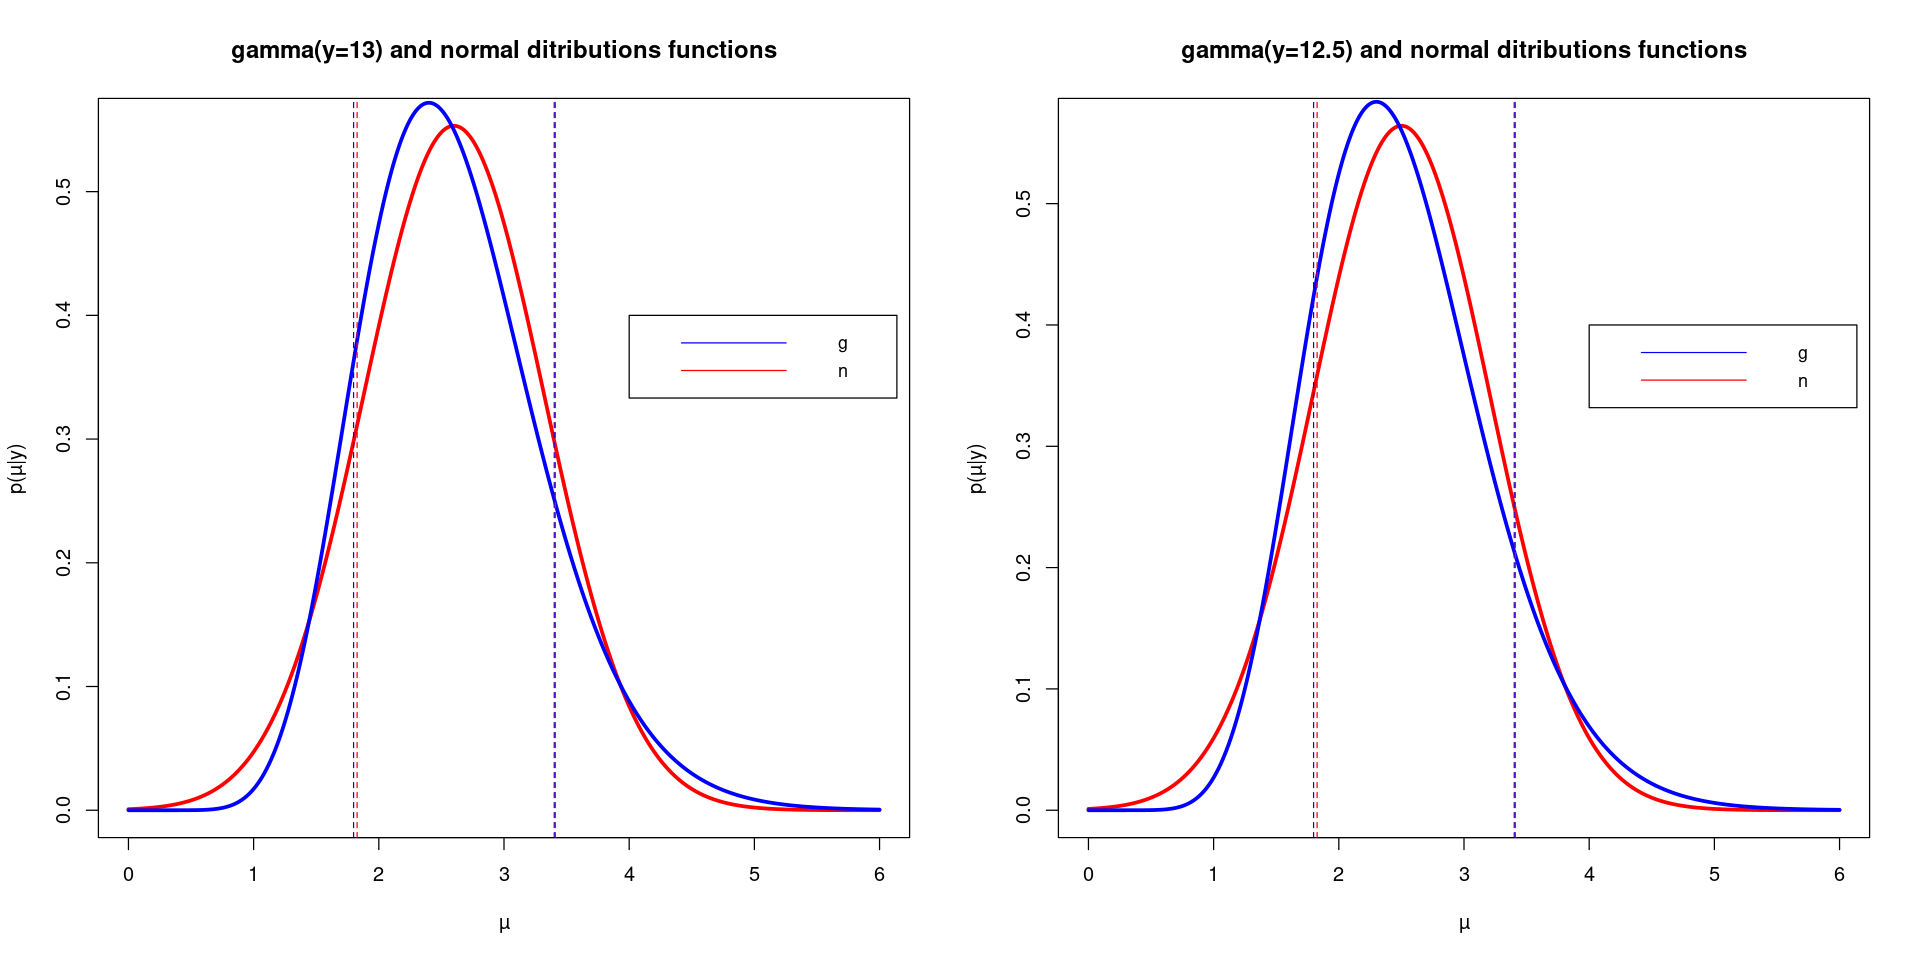

In [41]:
x <- seq(0,6,0.01) ## rnage x 
yPO_g13 <- c()
yPO_n13 <- c()
yPO_g12.5 <- c()
yPO_n12.5 <- c()

for (i in x){
    yPO_g13 <- dgamma(x, shape = y+1, rate = lambda)
    yPO_n13 <- dnorm(x, mean = 2.6, sd = sqrt(0.52), log = FALSE)
    yPO_g12.5 <- dgamma(x, shape = y+0.5, rate = lambda)
    yPO_n12.5 <- dnorm(x, mean = 2.5, sd = sqrt(0.5), log = FALSE)
}

options(repr.plot.width=16,repr.plot.height=8)
par(mfrow=c(1,2))

plot(x,yPO_n13, type='l',xlab='µ',ylab='p(µ|y)',lwd=3, col ='red',
     main = sprintf ("gamma(y=13) and normal ditributions functions"))
legend(4,0.4,c('g','n'), col=c('blue','red'),lty=1,cex=0.9)
lines(x,yPO_g13, type='l',lwd=3, col ='blue')
abline(v = ci_norm_j$CI_low, lty = 2, col = 'blue')
abline(v = ci_norm_j$CI_high, lty = 2, col = 'blue')
abline(v = ci_u$CI_high, lty = 2, col = 'red')
abline(v = ci_u$CI_low, lty = 2, col = 'red')

plot(x,yPO_n12.5, type='l',xlab='µ',ylab='p(µ|y)',lwd=3, col ='red',
     main = sprintf ("gamma(y=12.5) and normal ditributions functions"))
legend(4,0.4,c('g','n'), col=c('blue','red'),lty=1, cex=0.9)
lines(x,yPO_g12.5, type='l',lwd=3, col ='blue')
abline(v = ci_norm_j$CI_low, lty = 2, col = 'blue')
abline(v = ci_norm_j$CI_high, lty = 2, col = 'blue')
abline(v = ci_u$CI_high, lty = 2, col = 'red')
abline(v = ci_u$CI_low, lty = 2, col = 'red')

## Exercise 2
#### • given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown

In [70]:
a <- 1 ## true α
b <- 1 ## true β
teta <- runif(50, min = -pi/2, max = pi/2) ## teta has a uniform distribution 
data <- a+(b*tan(teta)) ## creating data


n.sample <- 200
alpha.min <- -6; alpha.max <- +6
beta.min <- 0; beta.max <- +6
h_a <- (alpha.max - alpha.min)/n.sample
h_b <- (beta.max - beta.min)/n.sample

alpha <- seq(from=alpha.min, by=h_a, length.out=n.sample+1)
beta <- seq(from=beta.min, by=h_b, length.out=n.sample+1)

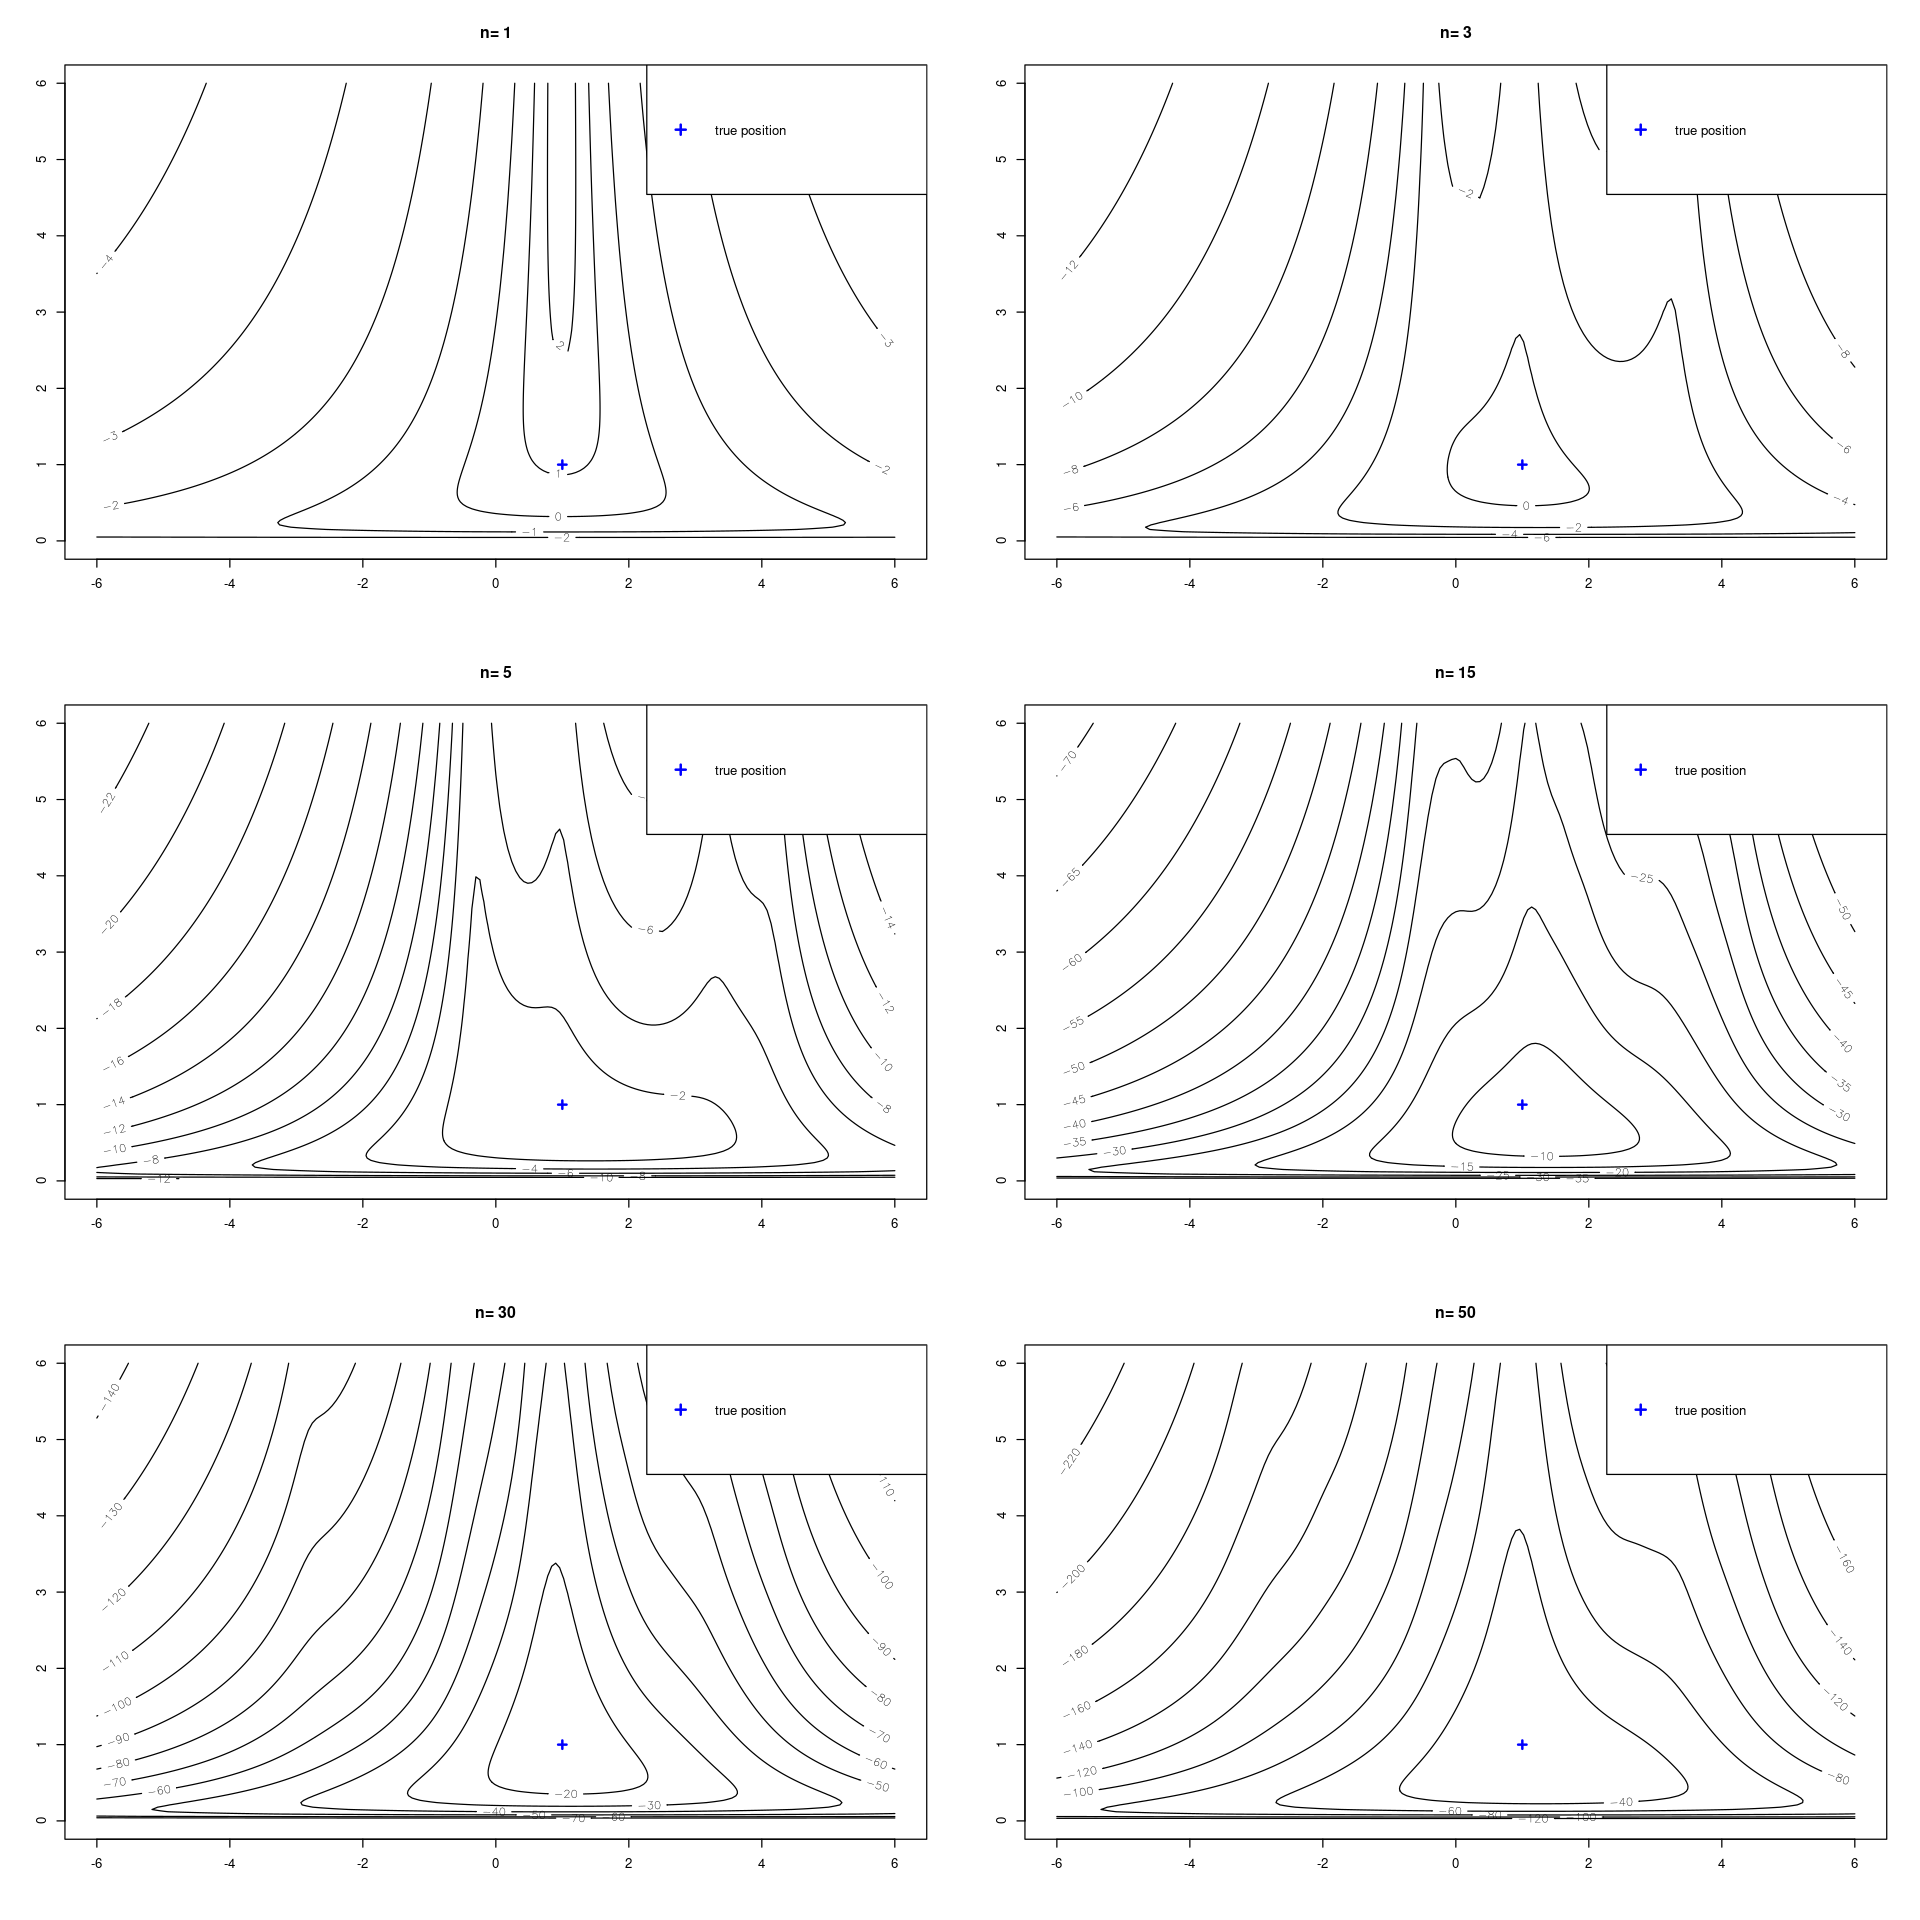

In [83]:
## if we do not have any information about β so it has a uniform prior distribution
## we can use  p(α,β|{xk}) ∝ p({xk}|α,β)= (β/π)*(1/(β^2 + (x − α)^2))

p_ab <- function(a,b, data){ ### log(p({xk}|α,β)= (β/π)*(1/(β^2 + (x − α)^2)))
    p <- 0
    for (x in data){
        p <- p - log((b/(pi))*(1/((b)**2)+((x-a)**2)))
                     }
    return(p)                   
}
options(repr.plot.width=16,repr.plot.height=16)
par(mfrow=c(3,2))

aa<- c() ## storing max α 
bb<- c() ## storing max β 
n <- c(1,3,5,15,30,50)

for (i in 1:length(n)){
    dt <- data[1:n[i]]
    f <- function(a,b) p_ab(a,b,dt)
    ou <- outer(alpha,beta,Vectorize(f))
    contour(alpha, beta, ou, xlim=c(-6,6), ylim=c(0,6),
            main =paste('n=',as.character(n[i])))
    points(a, b, pch=3, col="blue", lwd=2) # true value
    legend("topright",c("true position"), col="blue", pch=3, pt.cex=1.2, pt.lwd=2) 

    index <- which(ou==max(ou,na.rm=TRUE),arr.ind=TRUE) ## finding max α and β
    aa[i] <- alpha[index[1]]
    bb[i] <- beta[index[2]]
    
}

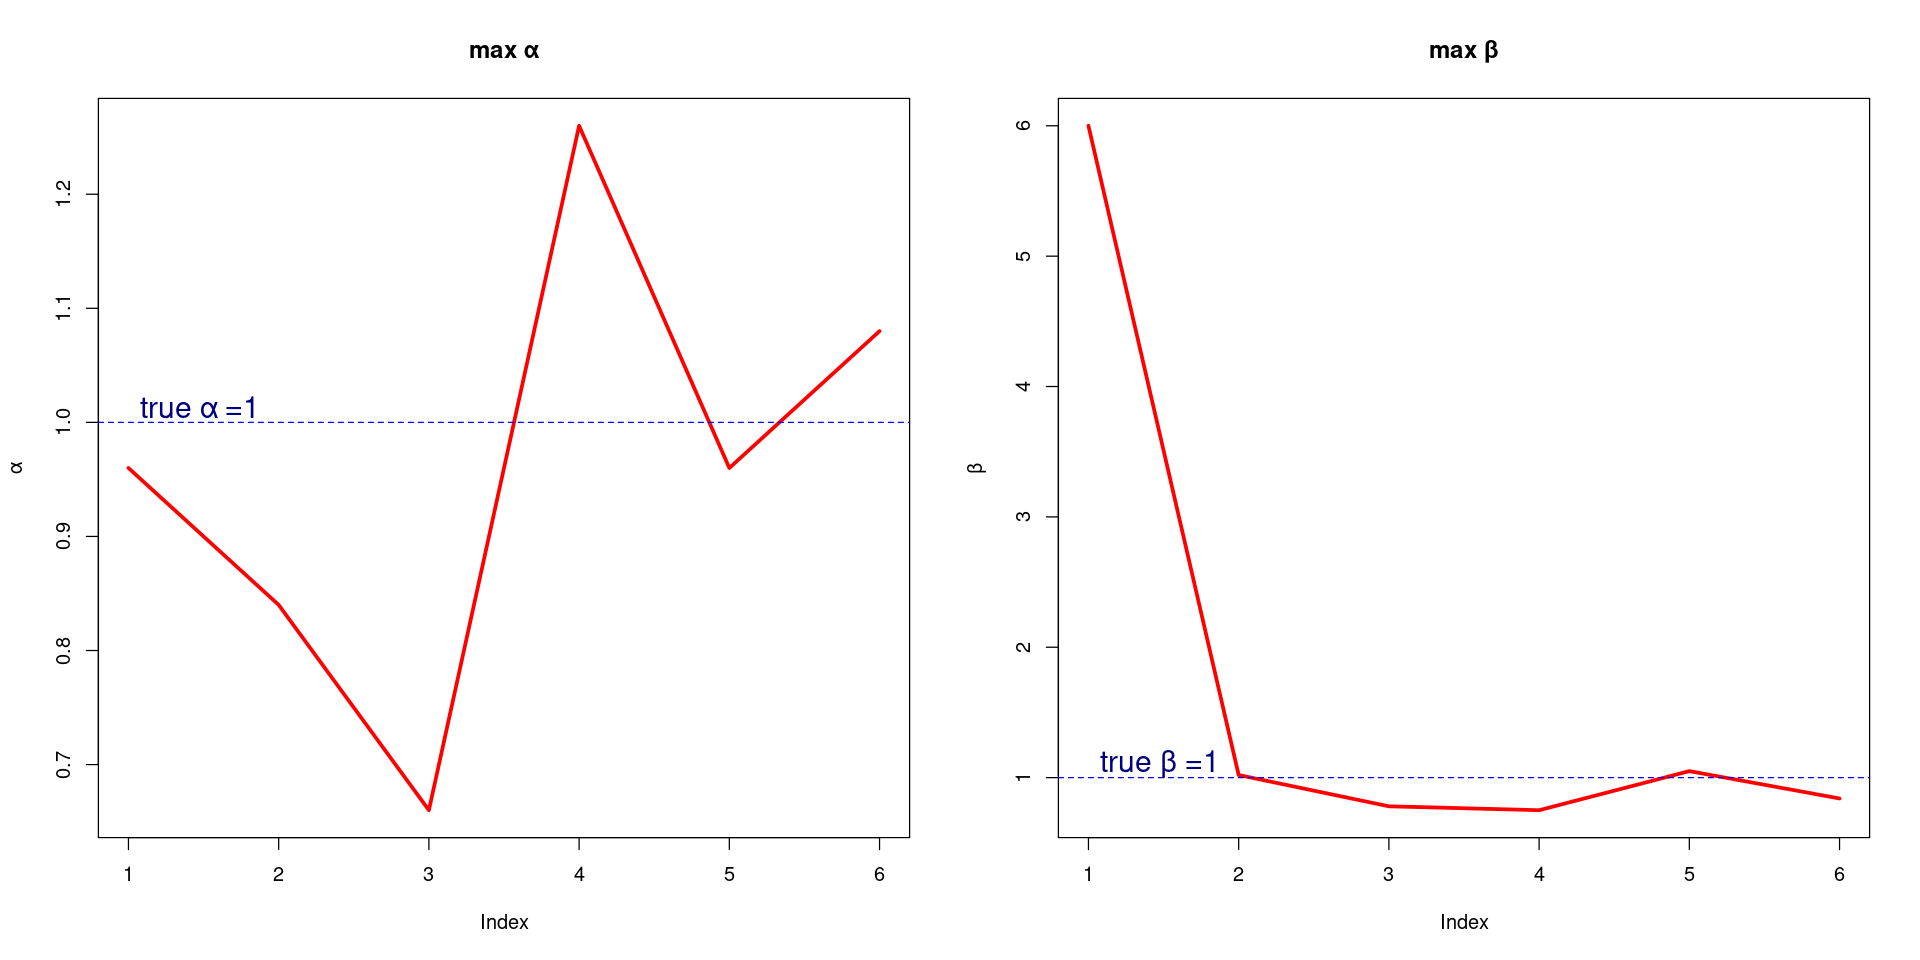

In [100]:
options(repr.plot.width=16,repr.plot.height=8)
par(mfrow=c(1,2))
plot(aa, type='l',ylab='α',lwd=3, col ='red',
     main = sprintf ("max α"))
abline(h = 1, lty = 2, col = 'blue')
text(1,1.01, col='navy', lwd = 2, pos=4, cex=1.5,
        paste("true α =1"))

plot(bb, type='l',ylab='β',lwd=3, col ='red',
     main = sprintf ("max β"))
abline(h = 1, lty = 2, col = 'blue')
text(1,1.1, col='navy', lwd = 2, pos=4, cex=1.5,
        paste("true β =1"))

## Exercise 3
#### • given the Signal over Background example discussed last week, analyze and discuss the following cases:
#### (a) vary the sampling resolution of used to generate the data, keeping the same sampling range
#### xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
#### • change the resolution w = {0.1, 0.25, 1, 2, 3}
#### • Check the effect on the results

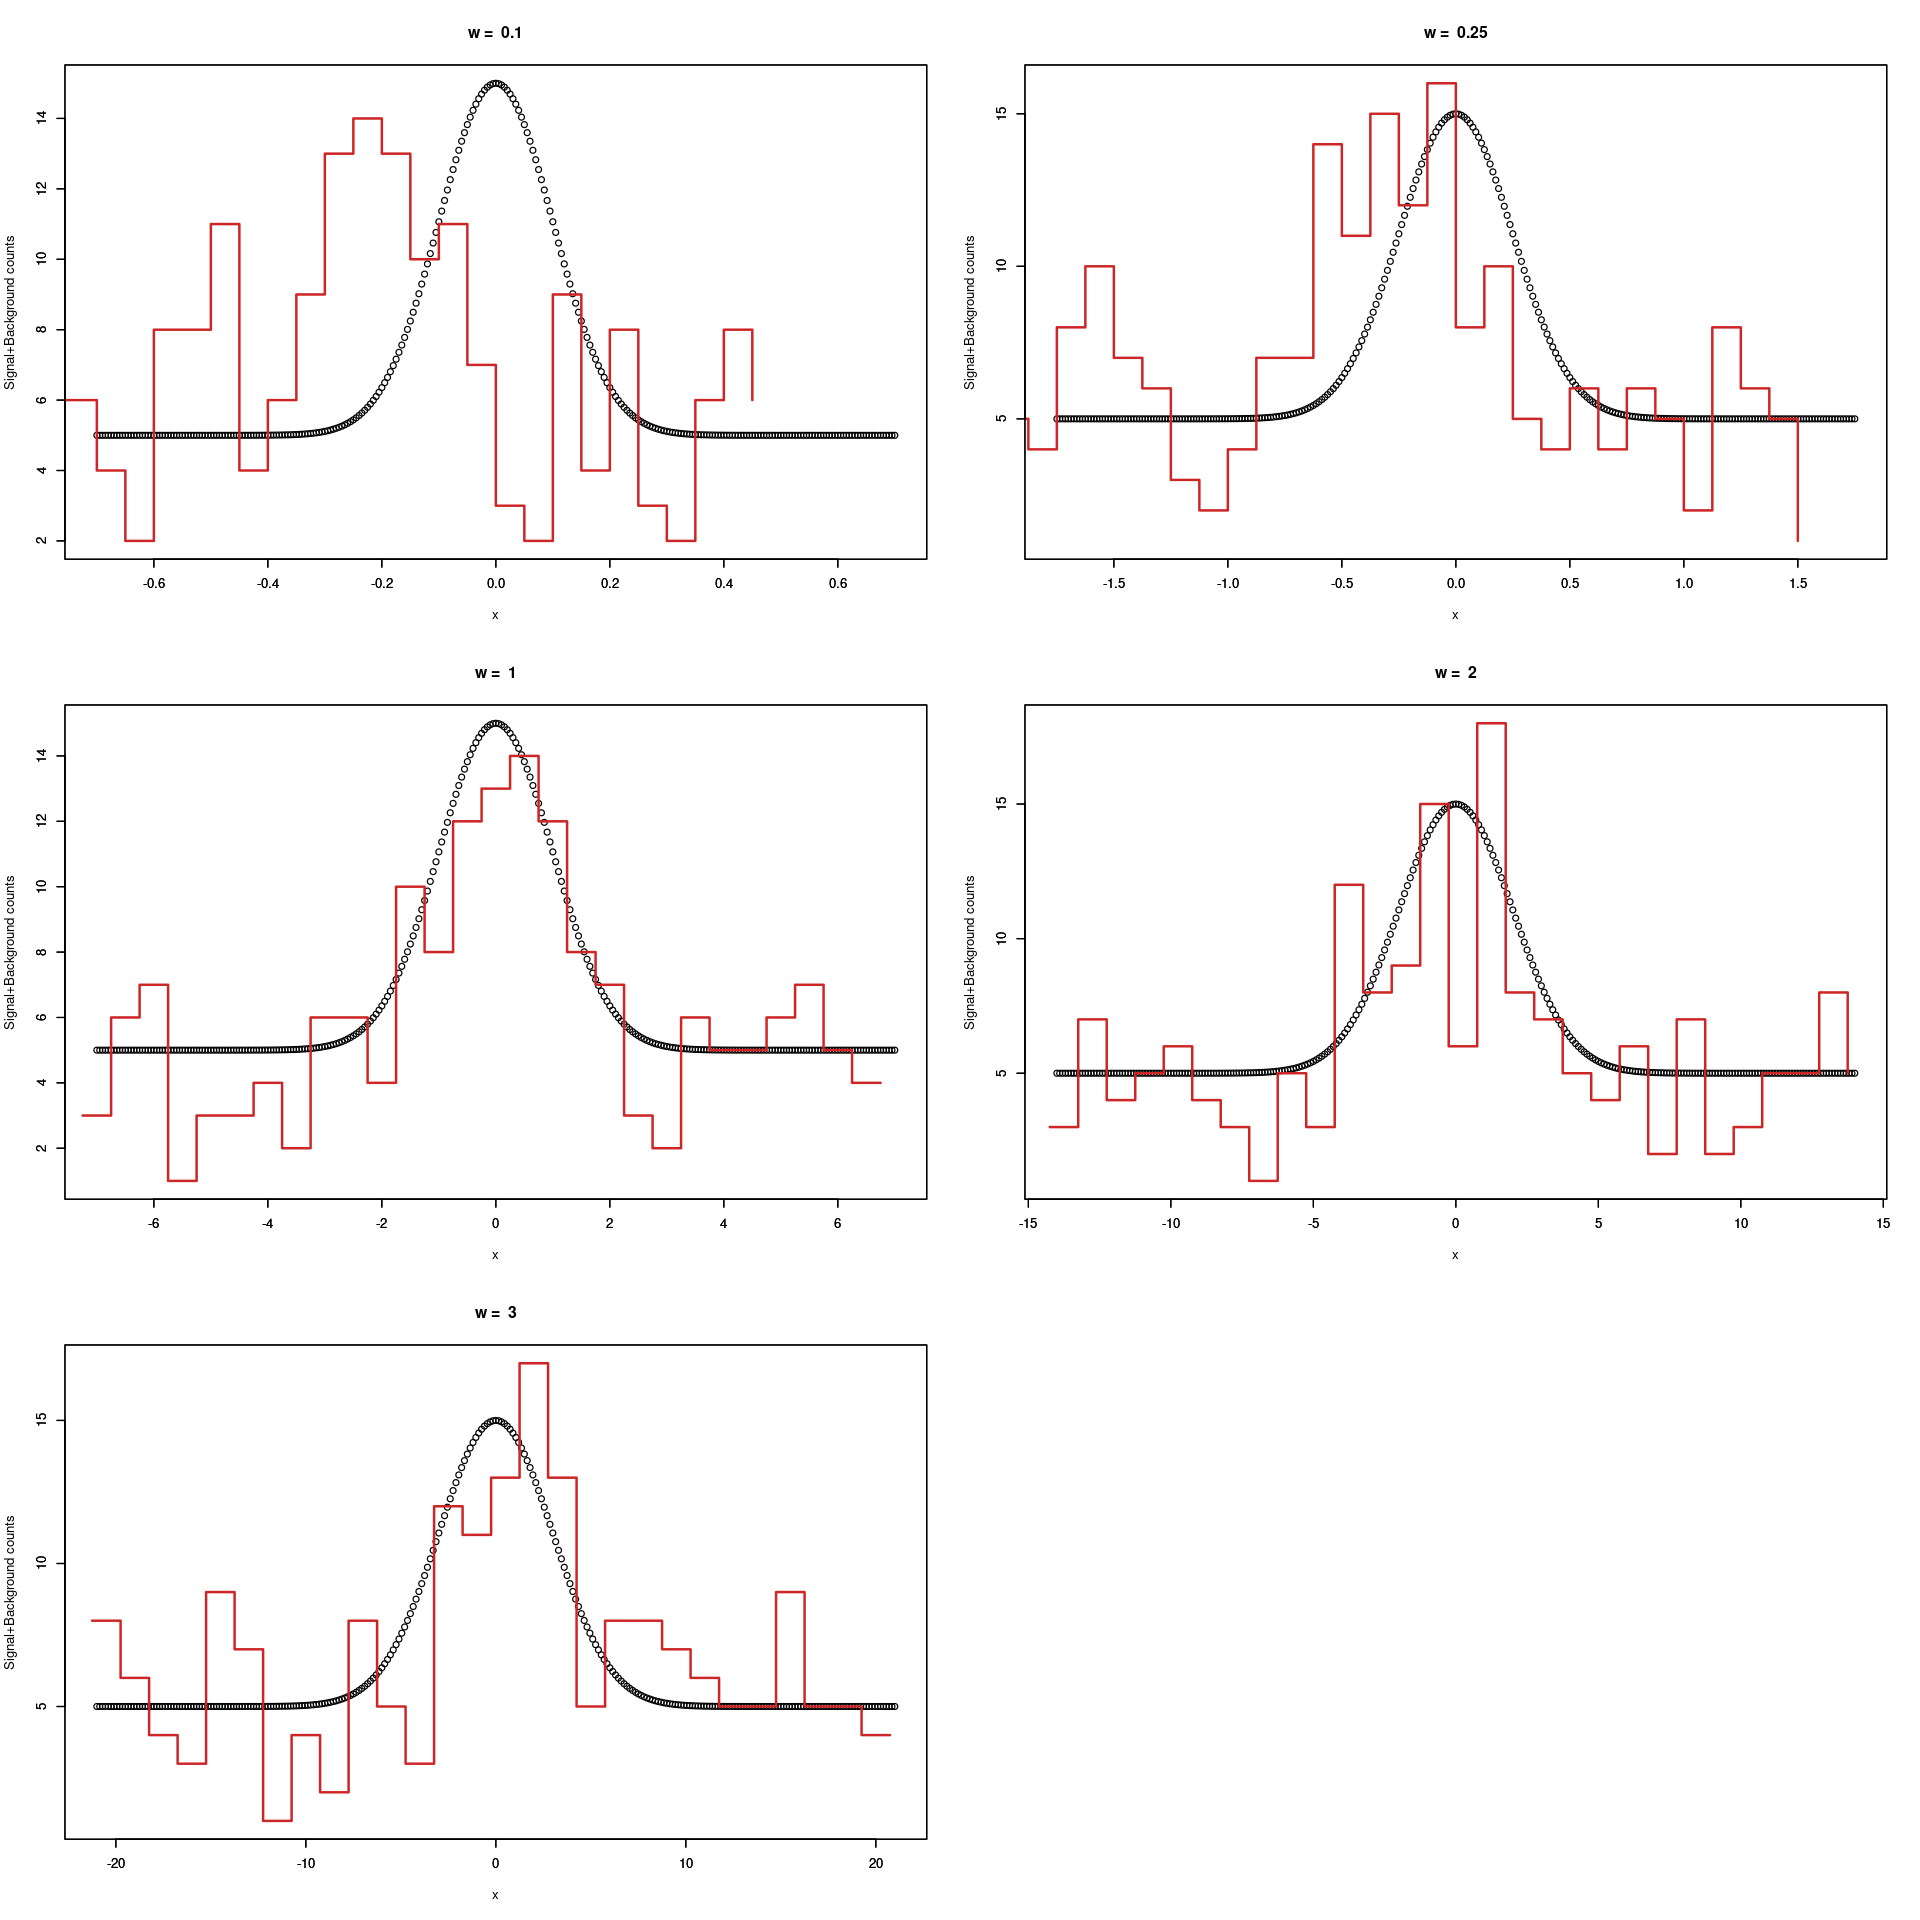

In [114]:
# - Generative model
signal <- function(x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)**2/(2*w**2)) + b)
}
# Define model parameters
x0 <- 0 # Signal peak
w <-c(0.1,0.25,1,2,3)# Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(205)

options(repr.plot.width=16,repr.plot.height=16)
par(mfrow=c(3,2))
for(j in 1:length(w)){
    xdat <- seq(from=-7*w[j], to=7*w[j], by=0.5*w[j])
    
    s.true <- signal(xdat , A.true , B.true , x0, w[j], Delta.t)
    ddat <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w[j])
    splot <- signal(xplot , A.true , B.true , x0, w[j], Delta.t)
    
    plot(xplot , splot ,
    xlab="x", ylab="Signal+Background counts",ylim=range(min(ddat),max(c(max(splot),max(ddat)))),
            main =paste('w = ',as.character(w[j])))
    
    par(new=TRUE)
    
    xdat.off <- xdat-0.25 
    plot(xdat.off, ddat , type='s',col='firebrick3',xlab="", ylab="",
    lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))   
}

## it seems w=2 is beter

#### (b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior) 
#### • Check the effect on the results

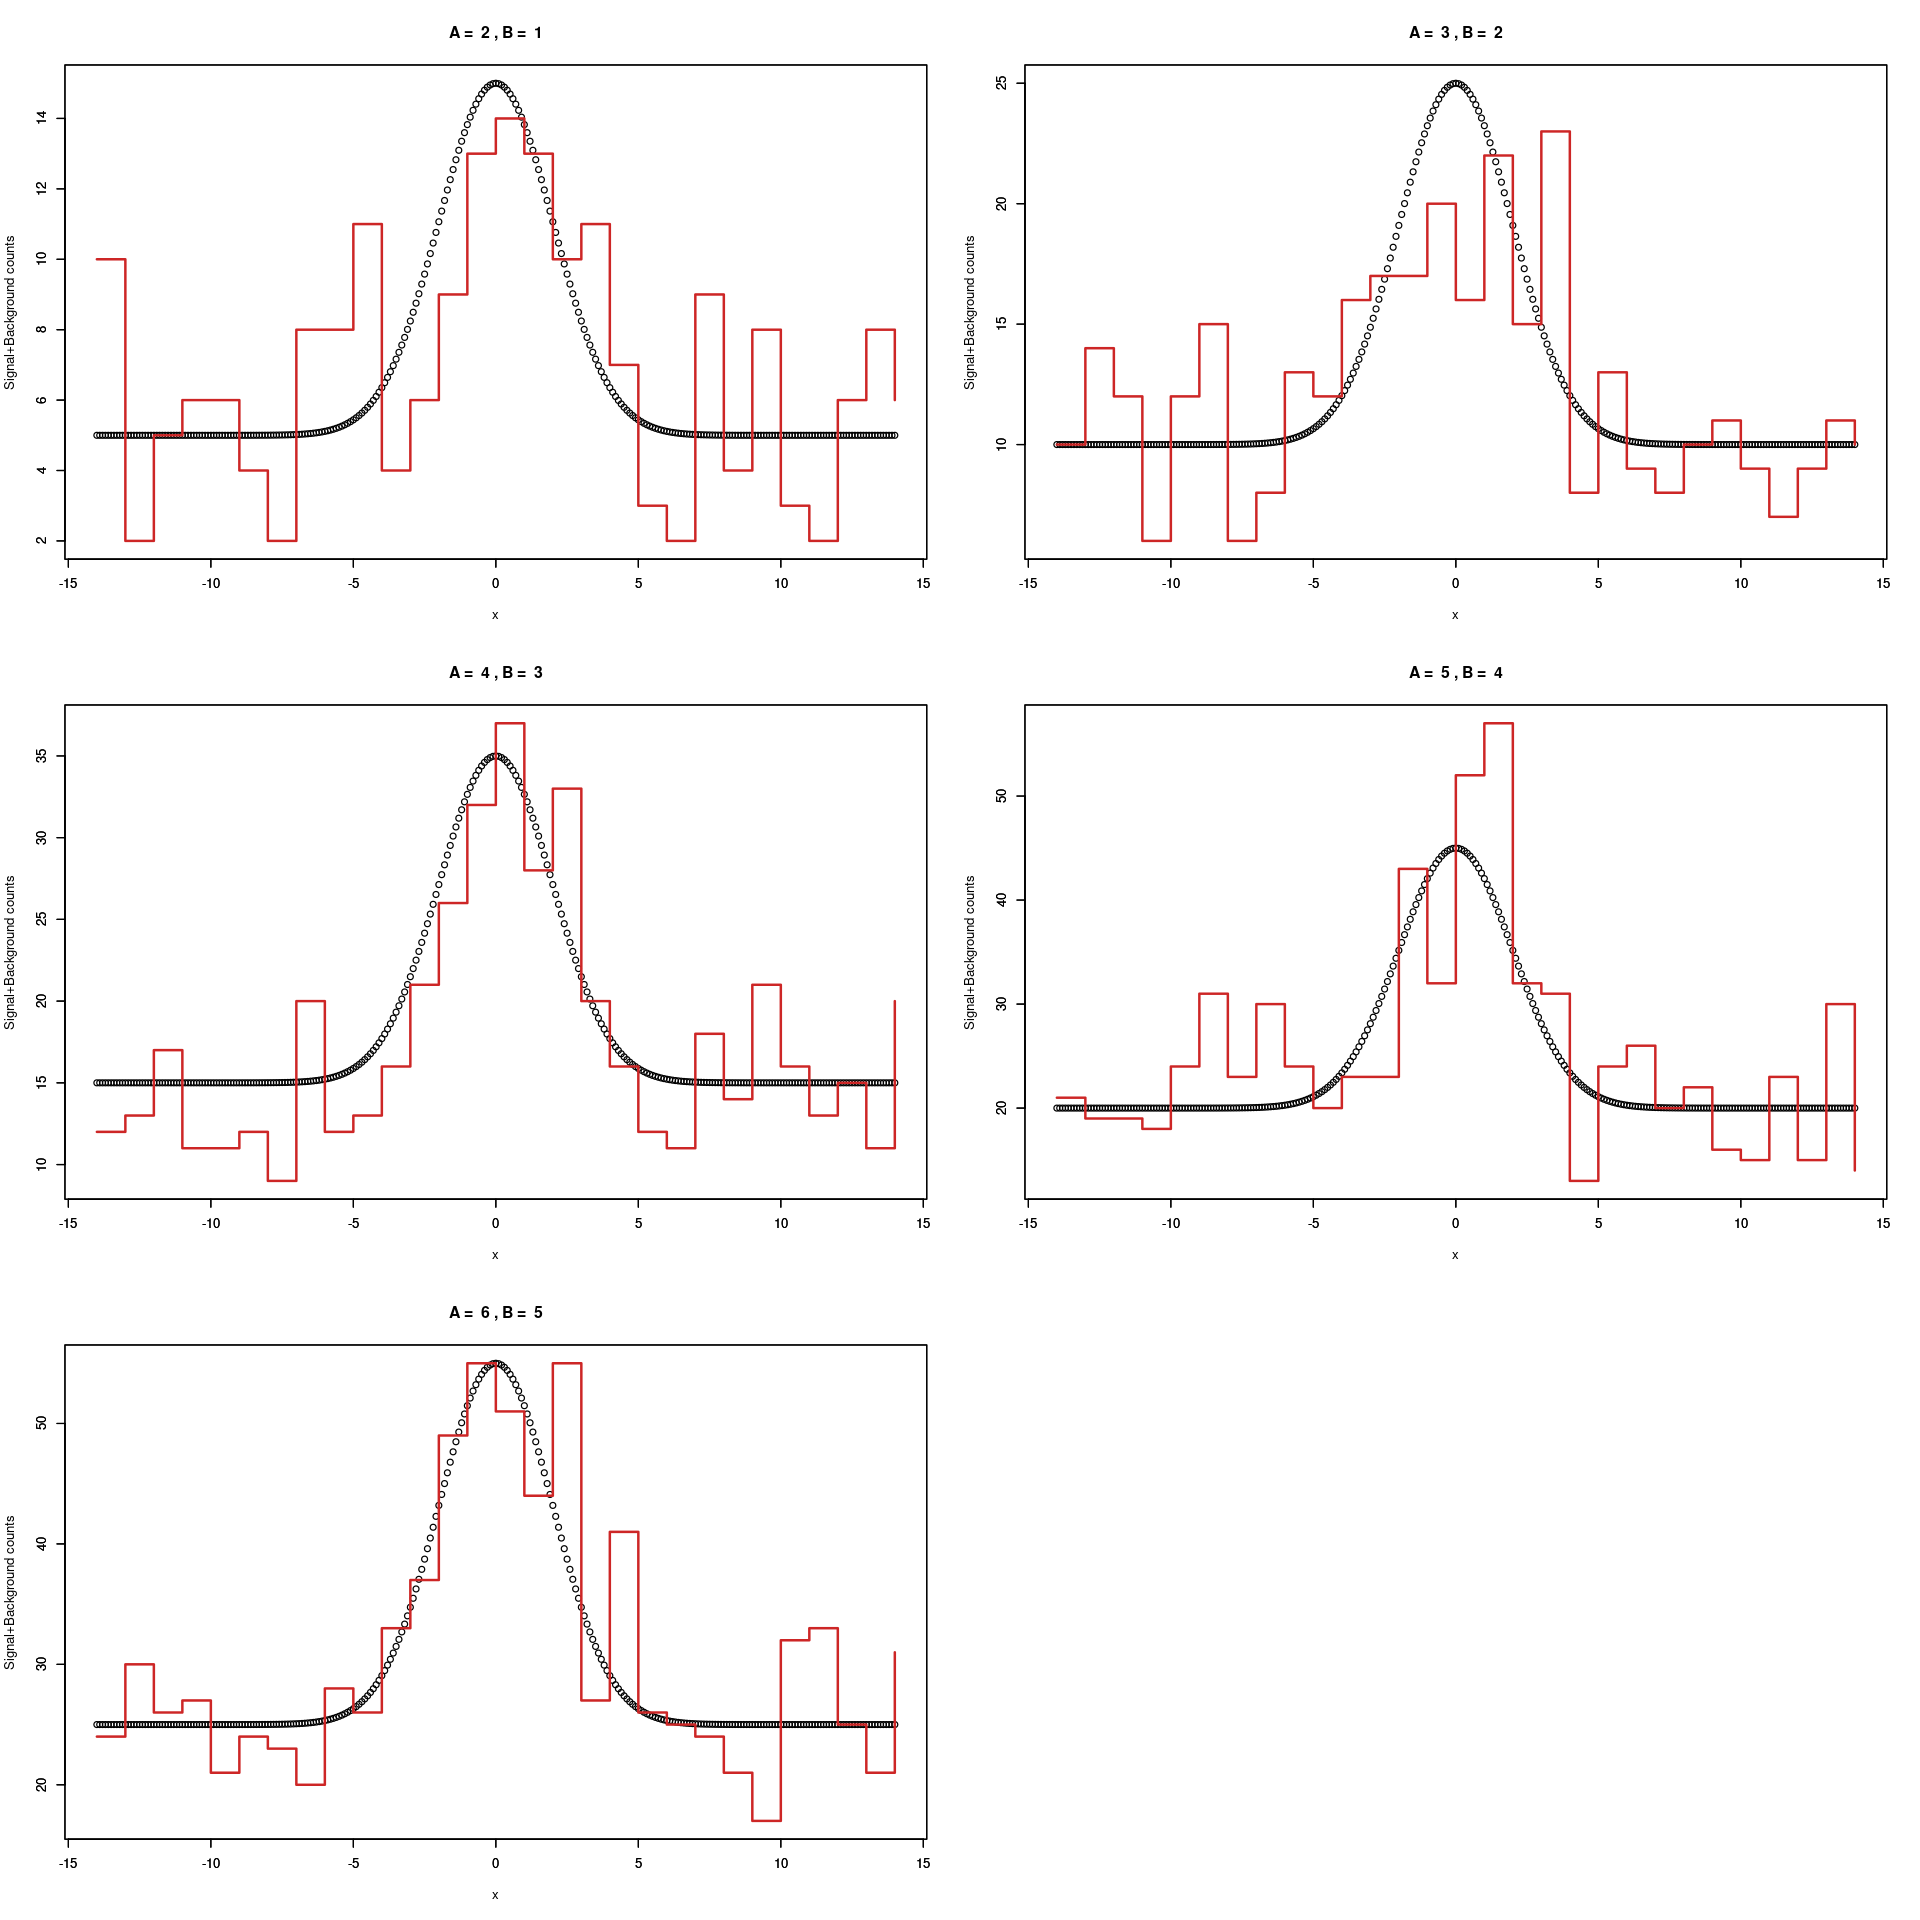

In [113]:
# - Generative model
signal <- function(x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)**2/(2*w**2)) + b)
}
# Define model parameters
x0 <- 0 # Signal peak
w <- 2# Signal width
A.true <- c(2,3,4,5,6) # Signal amplitude
B.true <- c(1,2,3,4,5) # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(205)
options(repr.plot.width=16,repr.plot.height=16)
par(mfrow=c(3,2))
for(j in 1:length(A.true)){
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true[j] , B.true[j] , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true[j] , B.true[j] , x0, w, Delta.t)
    plot(xplot , splot , xlab="x", ylab="Signal+Background counts",ylim=range(min(ddat),max(c(max(splot),max(ddat)))),
        main =paste('A = ',as.character(A.true[j]),', B = ', as.character(B.true[j])))
    par(new=TRUE)
    xdat.off <- xdat 
    plot(xdat.off, ddat , type='s',col='firebrick3',
    lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )),xlab="", ylab="")   
}

### with invreasing the A/B we have beter result becuase the signal becom biger than background
